In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key for gmap
from config import gkey

In [2]:
# Read Meteorite_Landings.csv file
meteorite_landings_df = pd.read_csv('Meteorite_Landings.csv')
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [3]:
# Count the row number of the dataset
len(meteorite_landings_df)

45716

In [4]:
# Modify the dataframe to grab "year" - split with " " space
year_split = meteorite_landings_df["year"].str.split(" ", n = 1, expand = True) 
year_split.head()

,0,1
0,01/01/1880,12:00:00 AM
1,01/01/1951,12:00:00 AM
2,01/01/1952,12:00:00 AM
3,01/01/1976,12:00:00 AM
4,01/01/1902,12:00:00 AM


In [5]:
# Modify the year_split to grab only "year" data - split with "/"
date_split = year_split[0].str.split("/", n = 2, expand = True) 
date_split.head()

,0,1,2
0,01,01,1880
1,01,01,1951
2,01,01,1952
3,01,01,1976
4,01,01,1902


In [6]:
# Name the date_split[2] to "Year", and add the data column to meteorite_landings dataframe
meteorite_landings_df["Year"]= date_split[2]
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",1880
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1951
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",1976
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",1902


In [7]:
# Delete 'year' column and use 'Year' column for data analyses
del meteorite_landings_df["year"]
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
0,Aachen,1,Valid,L5,21.0,Fell,50.77500,6.08333,"(50.775, 6.08333)",1880
1,Aarhus,2,Valid,H6,720.0,Fell,56.18333,10.23333,"(56.18333, 10.23333)",1951
2,Abee,6,Valid,EH4,107000.0,Fell,54.21667,-113.00000,"(54.21667, -113.0)",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,16.88333,-99.90000,"(16.88333, -99.9)",1976
4,Achiras,370,Valid,L6,780.0,Fell,-33.16667,-64.95000,"(-33.16667, -64.95)",1902


In [8]:
# Sort the dataset with Year
sort_meteorite_landings_df = meteorite_landings_df.sort_values(["Year"], ascending=True)
sort_meteorite_landings_df.head(20)

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",0860
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,42.51667,12.51667,"(42.51667, 12.51667)",0920
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491
1043,Valdinoce,24146,Valid,Stone-uncl,NaN,Fell,44.06667,12.10000,"(44.06667, 12.1)",1495
730,Oliva-Gandia,18012,Valid,Stone-uncl,NaN,Fell,39.00000,-0.03333,"(39.0, -0.03333)",1519
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,39.80000,16.20000,"(39.8, 16.2)",1583
26174,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,27.05000,-105.43333,"(27.05, -105.43333)",1600


In [9]:
# Set up a bin to create graphs based on Year
# But first, check data types
sort_meteorite_landings_df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
reclat         float64
reclong        float64
GeoLocation     object
Year            object
dtype: object

In [10]:
# Change Year datatypes to integer
sort_meteorite_landings_df["Year"] = pd.to_numeric(sort_meteorite_landings_df["Year"])
#sort_meteorite_landings_df.dtypes

In [11]:
# Drop missing data row
clean_meteorite_landings_df = sort_meteorite_landings_df.dropna(how="any")

In [12]:
clean_meteorite_landings_df["Year"].max

<bound method Series.max of 704       860.0
278      1399.0
856      1490.0
283      1491.0
5365     1575.0
          ...  
30775    2013.0
30774    2013.0
30762    2013.0
30730    2013.0
30682    2101.0
Name: Year, Length: 38115, dtype: float64>

In [13]:
# Set up bins for Years
year_bins = [0, 1899.999, 1949.999, 1999.999, 2020]
group_names = ["<1900", "1900-1950", "1950-2000", "2000-2020"]

In [14]:
# Add a new column named Year Ramge amd binnning based off the range
clean_meteorite_landings_df["Year Range"] = pd.cut(clean_meteorite_landings_df["Year"], year_bins, labels=group_names)

/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
del clean_meteorite_landings_df["Year"]
clean_meteorite_landings_df

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year Range
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",<1900
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",<1900
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",<1900
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",<1900
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",<1900
...,...,...,...,...,...,...,...,...,...,...
30775,Northwest Africa 7856,57421,Valid,LL6,517.0,Found,0.00000,0.00000,"(0.0, 0.0)",2000-2020
30774,Northwest Africa 7855,57420,Valid,H4,916.0,Found,0.00000,0.00000,"(0.0, 0.0)",2000-2020
30762,Northwest Africa 7812,57258,Valid,Angrite,46.2,Found,0.00000,0.00000,"(0.0, 0.0)",2000-2020
30730,Northwest Africa 7755,57166,Valid,Martian (shergottite),30.0,Found,0.00000,0.00000,"(0.0, 0.0)",2000-2020


In [16]:
# Count rows for each year range
clean_meteorite_landings_count_df = clean_meteorite_landings_df.groupby("Year Range")["mass (g)"].count()
clean_meteorite_landings_count_df

Year Range
<1900          706
1900-1950      930
1950-2000    23074
2000-2020    13404
Name: mass (g), dtype: int64

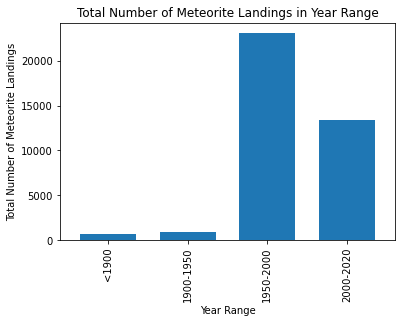

In [17]:
# Bar graph
clean_meteorite_landings_count_df.plot(kind='bar', width=0.7)
plt.title("Total Number of Meteorite Landings in Year Range")
plt.xlabel("Year Range")
plt.ylabel("Total Number of Meteorite Landings")
plt.show()

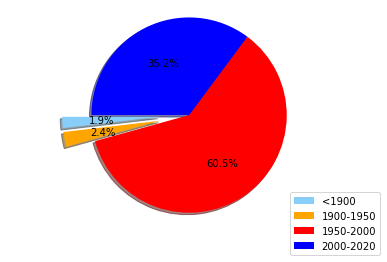

In [19]:
# Pie Chart
colors = ["lightskyblue", "orange", "red", "blue"]
explode = (0.3, 0.3, 0, 0)
pie = plt.pie(clean_meteorite_landings_count_df, startangle=180, explode=explode, colors=colors, 
              shadow=True, autopct='%1.1f%%')
plt.axis("equal")
labels=clean_meteorite_landings_count_df.index.values
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)

plt.show()

In [20]:
# Calculate mean of meteorite for each year range
clean_meteorite_landings_df.groupby("Year Range")["mass (g)"].mean()

Year Range
<1900        459976.904391
1900-1950    197310.694570
1950-2000      2835.281199
2000-2020      1563.482387
Name: mass (g), dtype: float64

In [21]:
# Calculate SE and create a graph
from scipy.stats import sem

means = clean_meteorite_landings_df.groupby("Year Range")["mass (g)"].mean()
standard_errors = clean_meteorite_landings_df.groupby("Year Range")["mass (g)"].sem()
x_axis = list(means.index.values)

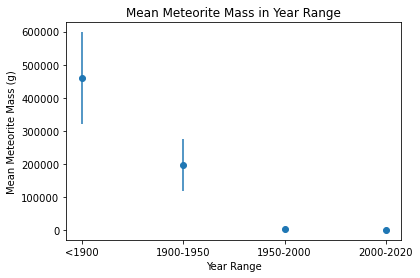

In [22]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlabel("Year Range")
ax.set_ylabel("Mean Meteorite Mass (g)")
ax.set_title("Mean Meteorite Mass in Year Range")
plt.show()

In [23]:
# Create boxplot with meteorite mass in year range
# Change mass (g) to (kg), and Log10 (kg)
mass_kilo = round(clean_meteorite_landings_df["mass (g)"]/ 1000, 2)
logten_mass = np.log10(mass_kilo)
logten_mass

/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


704     -0.327902
278      2.029384
856     -1.000000
283      2.103804
5365     4.698970
           ...   
30775   -0.283997
30774   -0.036212
30762   -1.301030
30730   -1.522879
30682   -1.221849
Name: mass (g), Length: 38115, dtype: float64

In [24]:
# Data frame for boxplot for mass (kg)
clean_meteorite_landings_df["log10(mass kg)"] = logten_mass
clean_meteorite_landings_df.head()

/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year Range,log10(mass kg)
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",<1900,-0.327902
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",<1900,2.029384
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",<1900,-1.000000
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",<1900,2.103804
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",<1900,4.698970


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
mass_year_list = ["<1900", "1900-1950", "1950-2000", "2000-2020"]

# Create empty list to fill with mass data (for plotting)
mass_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for year in mass_year_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes 
    mass = clean_meteorite_landings_df.loc[clean_meteorite_landings_df["Year Range"] == year, 'log10(mass kg)']
    
    # add subset to the tumor_vol_list   
    mass_list.append(mass)
    
    # Calculate quartile for each drug regimen
    quartiles = mass.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    
    # Obtain outliers and print out for each drug regimen
    outliers = mass.loc[(mass < lower_bound) | (mass > upper_bound)]
    #print(f"{year}'s potential outliers: {outliers}")  

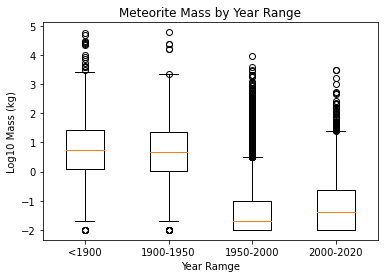

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title("Meteorite Mass by Year Range")
ax.set_xlabel("Year Ramge")
ax.set_ylabel("Log10 Mass (kg)")
ax.boxplot(mass_list)
plt.xticks([1,2,3,4], mass_year_list)

plt.show()

In [27]:
# Check Max Meteorites Mass
clean_meteorite_landings_df["mass (g)"].max

<bound method Series.max of 704           472.0
278        107000.0
856           103.3
283        127000.0
5365     50000000.0
            ...    
30775         517.0
30774         916.0
30762          46.2
30730          30.0
30682          55.0
Name: mass (g), Length: 38115, dtype: float64>

In [28]:
# Set up bins for Meteorite Mass
mass_bins = [0, 0.444, 0.999, 9.999, 99.999, 999.999, 4999.999, 9999.999, 50000000]
mass_names = ["<0.5", "0.5-1", "1-10", "10-100", "100-1000", "1000-5000", "5000-10000", ">10000"]


In [29]:
mass_meteorite_landings_df = sort_meteorite_landings_df.dropna(how="any")

In [30]:
# Add a new column named Mass Range and binnning based off the range
mass_meteorite_landings_df["Mass Range"] = pd.cut(mass_meteorite_landings_df["mass (g)"], mass_bins, labels=mass_names)

/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
del mass_meteorite_landings_df["mass (g)"]
mass_meteorite_landings_df

,name,id,nametype,recclass,fall,reclat,reclong,GeoLocation,Year,Mass Range
704,Nogata,16988,Valid,L6,Fell,33.72500,130.75000,"(33.725, 130.75)",860.0,100-1000
278,Elbogen,7823,Valid,"Iron, IID",Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399.0,>10000
856,Rivolta de Bassi,22614,Valid,Stone-uncl,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490.0,100-1000
283,Ensisheim,10039,Valid,LL6,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491.0,>10000
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575.0,>10000
...,...,...,...,...,...,...,...,...,...,...
30775,Northwest Africa 7856,57421,Valid,LL6,Found,0.00000,0.00000,"(0.0, 0.0)",2013.0,100-1000
30774,Northwest Africa 7855,57420,Valid,H4,Found,0.00000,0.00000,"(0.0, 0.0)",2013.0,100-1000
30762,Northwest Africa 7812,57258,Valid,Angrite,Found,0.00000,0.00000,"(0.0, 0.0)",2013.0,10-100
30730,Northwest Africa 7755,57166,Valid,Martian (shergottite),Found,0.00000,0.00000,"(0.0, 0.0)",2013.0,10-100


In [32]:
# Count rows for each mass range
mass_meteorite_landings_df_count_df = mass_meteorite_landings_df.groupby("Mass Range")["name"].count()
mass_meteorite_landings_df_count_df

Mass Range
<0.5            316
0.5-1          1264
1-10          10498
10-100        13645
100-1000       8242
1000-5000      2294
5000-10000      554
>10000         1281
Name: name, dtype: int64

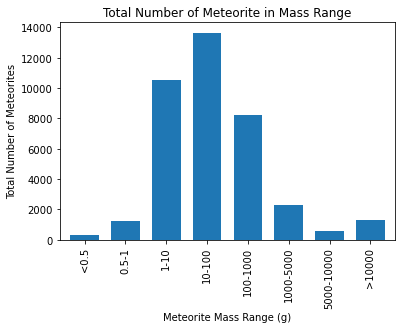

In [33]:
# Bar graph for meteorites mass range
mass_meteorite_landings_df_count_df.plot(kind='bar', width=0.7)
plt.title("Total Number of Meteorite in Mass Range")
plt.xlabel("Meteorite Mass Range (g)")
plt.ylabel("Total Number of Meteorites")
plt.show()